# 파이썬 완벽가이드
## 7단원_군집화

### 01. K-평균 알고리즘 이해

* K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘 -> K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법
* 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행 -> 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법
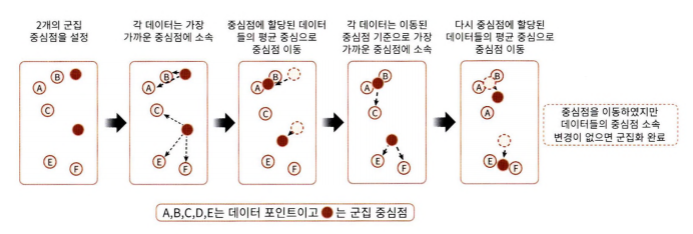

> * K-평균의 장점
>> * 일반적인 군집화에서 가장 많이 활용되는 알고리즘입니다.
>> * 알고리즘이 쉽고 간결합니다.
> * K-평균의 단점
>> * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어집니다(이를 위해 PCA로 차원 감소를 적용
해야 할 수도 있습니다).
>> * 반복을 수행하는데. 반복 횟수가 많을 경우 수행 시간이 매우 느려집니다.
>> * 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어렵습니다


* 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공

```class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10z max_iter=300, tol=0.0001,
precomp나te_distances='auto', verbose=0, random_state=None,
copy_x=True, nJobs=1, algorithm='auto')```

> * KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미.
> * init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++
방식으로 최초 설정.
> * maxjter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

* KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터세트) 메서드를 이용해 수행하면 됨. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수가 있다.
> * labels_： 각 데이터 포인트가 속한 군집 중심점 레이블
> * cluster_centers_： 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지
시각화할 수 있다.

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# irisDF['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)

irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


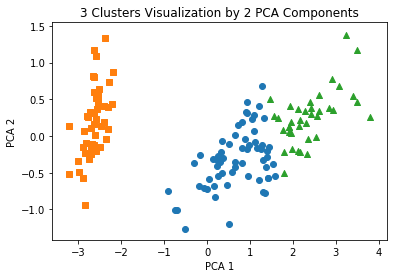

In [6]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

***군집화 알고리즘 테스트를 위한 데이터 생성***

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공하는데, 대표적인 군집화용 데이터 생성기로는 makc_blobs( )와 make_classification( ) API가 있다. <br>두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다. 둘 중에 어떤 것을 사용하든 큰 차이는 없지만, 
* make_blobs( )는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있으며 
* make_classifcation()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다. <br>
둘 다 분류 용도로도 테스트 데이터 생성이 가능. 이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용된다.

* . make_blobs()의 호출 파라미터;(make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환)<br>
> * n_samples： 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.
> * njeatures： 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.
> * centers： int 값 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.
> * cluster.std： 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어집니다. [0.8,1.2. 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다.
> * => X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환

In [7]:
## Clustering 알고리즘 테스트를 위한 데이터 생성

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


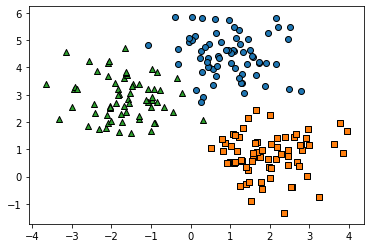

In [9]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

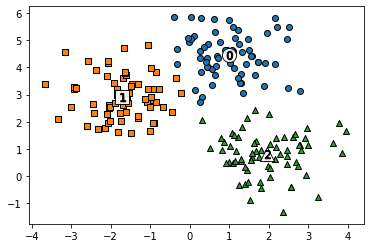

In [10]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### 02.군집 평가(Cluster Evaluation) 

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않다. 또한 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다름. 
* 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.
* 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용! => 군집화 평가 지표

***실루엣 분석의 개요***<br>
군집화 평가 방법으로 실루엣 분석(silhouette analysis)이 있다. 
* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 
> =>효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미. 군집화가 잘될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.
* 실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 합니다. 
> 실루엣 계수는 개별 데이터가 가지는 군집화 지표입니다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표.
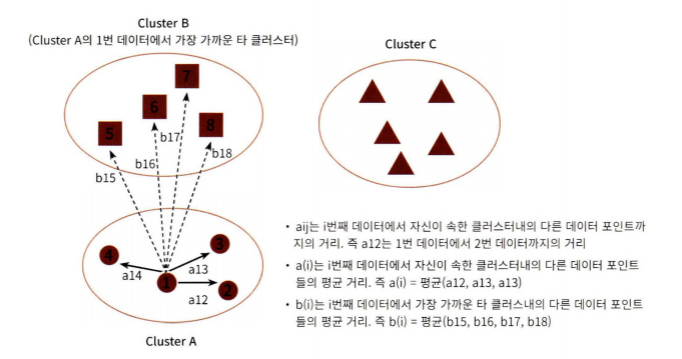
=> 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산됨. 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며
이 값을 정규화하기 위해 MAX( a(i), b(i) ) 값으로 나눈다. <br>따라서 번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의 : $s(i)=\frac{b(i) - a(i)}{MAX( a(i), b(i) )}$<br>
실루엣 계수는 -1에서 1 사이의 값을 가지며. 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 o에 가까울수록 근처의 군집과 가까워진다는 것입니다. - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.

* 사이킷런이 제공하는 실루엣 분석 메서드
> * sklearn.metrics.silhouette_samples(X, labels, metric= 'euclidean',**kwds)： 인자로 X feature 데이터 세트와 각
피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환.
> * sklearn.metrics.silhouette_score(X, labels, metric= 'euclidean', sample_size=None, **kwds)： 인자로 X
feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣
계수 값을 평균해 반환. 즉. np.mean(silhouette_samples()). 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없다.

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [14]:
## 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])  

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

[http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html] 참조

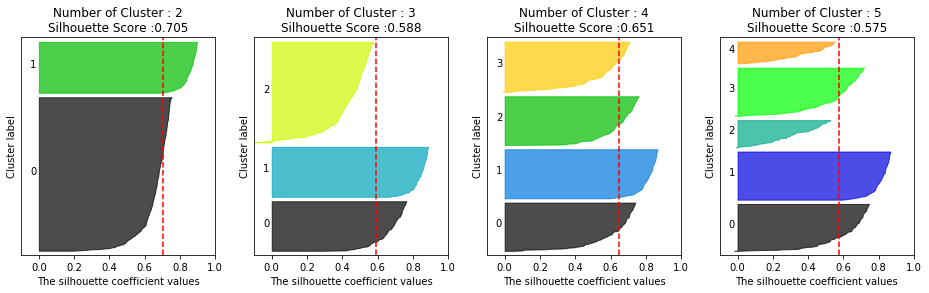

In [15]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

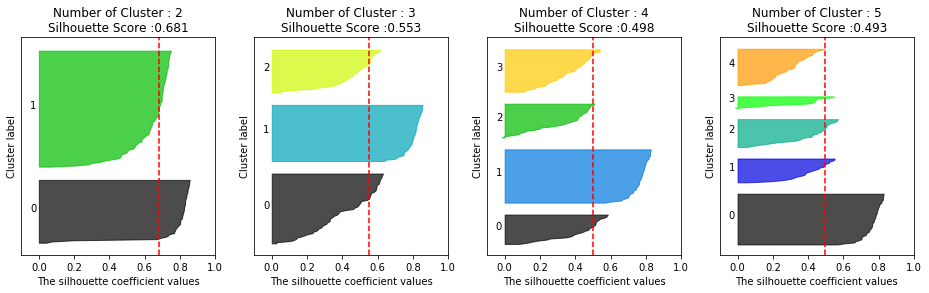

In [16]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

=> 붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아 보입니다. 3개의 경우 평균 실루엣 계수 값도 2개보다 작을 뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가큽니다. 4개, 5개의 경우도 마찬가지입니다.


실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족 등의 에러가 발생하기 쉽다. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.

### 03. 평균이동

평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 
* 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.
* 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)를 이용합니다. 
* 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel DensityEstimation)를 이용한다.
* 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.
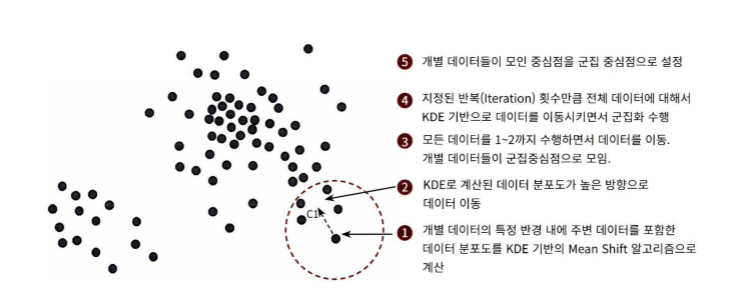
* KDE(Kernel Density Estimation)는 커 널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 
> * 확률 밀도 함수 PDF(Probability Density Function)는 확률
변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.
> * KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다. 다음 그림의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고 오른쪽은 적용 값을 모두 더한 KDE 결과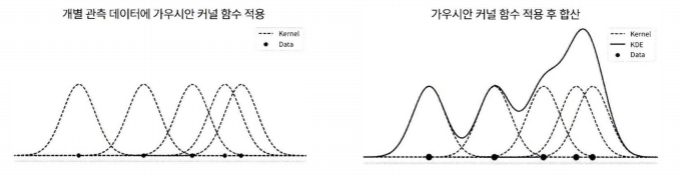.
$KDE=\frac{1}{n} \sum_{i=0}^{n} K_{h}(x-x_{i}) = \frac{1}{nh}\sum_{i=0}^{n}K \frac{(x-x_{i})}{h} $<br>
오는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth) 
>> * 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며. 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
>>> * 작은 h 값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는
변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다. 
>>> * 반대로 매우
큰 h 값(h=10)은 과도하게 평활화｛smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다.
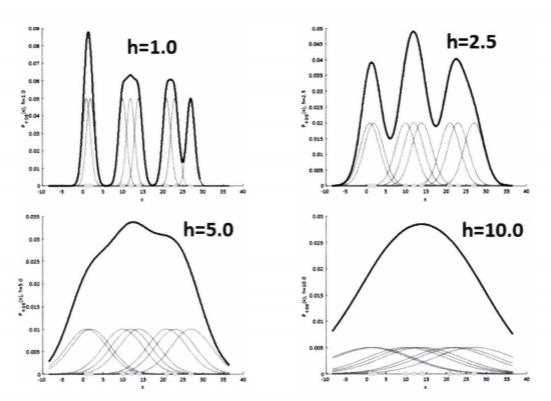

* 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며. 오직 대역폭의 크기에 따라 군집화를 수행한다. 

사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공한다. MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 유와 동일하다. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth( ) 함수를 제공.

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [19]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [20]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [21]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


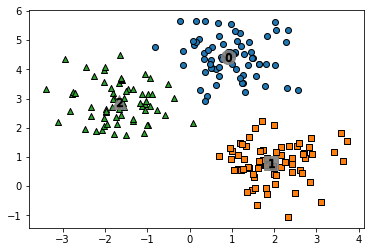

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [24]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


=> 평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정
하지 않기 때문에 좀 더 유연한 군집화가 가능한 것입니다. 또한 이상치의 영향력도 크지 않으며, 미리
군집의 개수를 정할 필요도 없습니다. 하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 큽니다.

(이 같은 특징 때문에 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터
비전 영역에서 더 많이 사용됩니다. 이이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적
하는 데 뛰어난 역할을 수행하는 알고리즘)

### 04. GMM(Gaussian Mixture Model)

***GMM(Gaussian Mixture Model) 소개***<br>
GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식.
* 정규 분포(Normal distribu tion)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수
* GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주
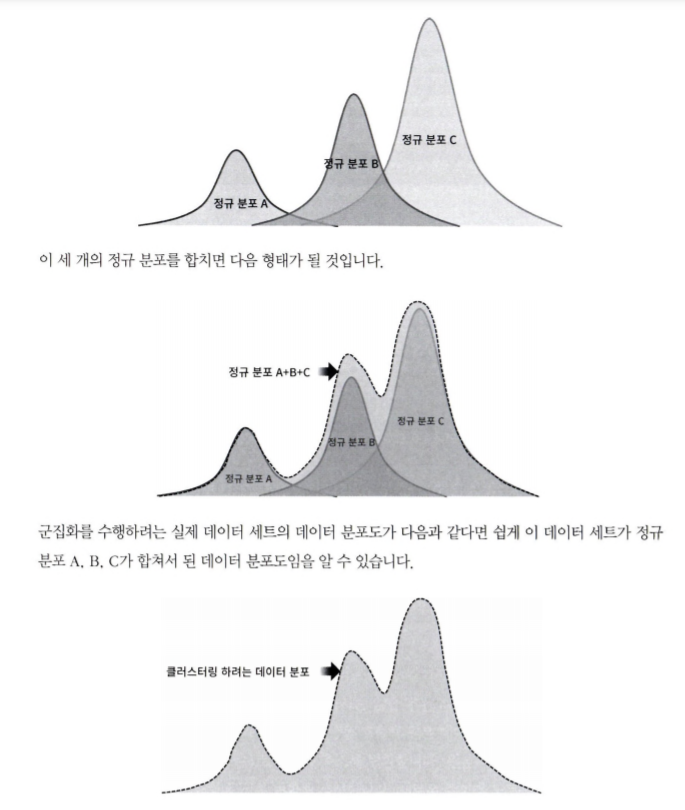
-> 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며,
이러한 서로 다른 정규 분포에 기반해 군집화을 수행하는 것이 GMM 군집화 방식. 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을추출하고, 개별 데이터가 이 중 어
떤 정규 분포에 속하는지 결정하는 방식.
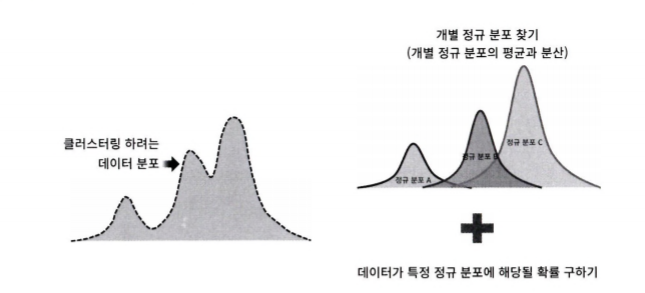

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것.
* 개별정규 분포의평균과 분산
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률

이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용. 사이킷런은 이러한
GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원

In [25]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [26]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


=> 이는 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이
라는 의미입니다. K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개
별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있습니다.

***GMM과 K—평균의 비교***<br>
KMeans는 원형의 범위에서 군집화를 수행합니다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 다음은 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한 결과다. 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다. 결과를 보면 KMeans로 효과
적으로 군집화된 것을 알 수 있다.
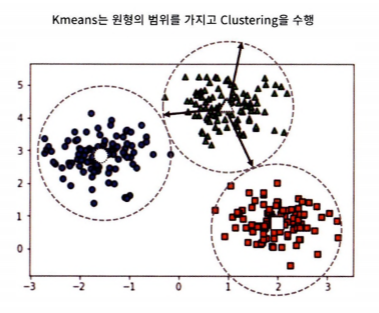

KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. 다음에서 해당 데이터 세트를 make_blobs()의 데이터를 변환해 만들어보겠습니다. 

In [28]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

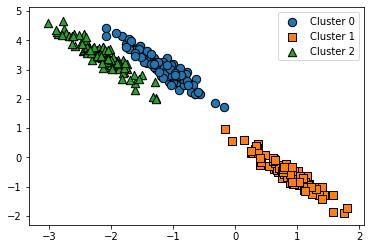

In [29]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

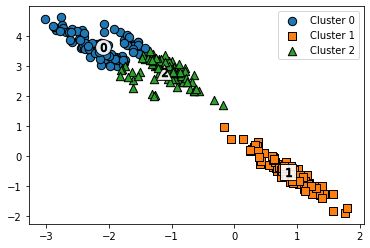

In [30]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)


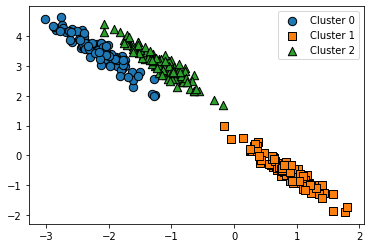

In [31]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)


In [32]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


=> KMeans의 경우 군집 1 번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생하고 있습니다. 하지만 GMM의 경우는 군집이 target 값과 잘 매핑돼 있습니다.

이처럼 GMM의 경우는 
* KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다. 
* 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.

### 05. DBSCAN

***DBSCAN 개요***<br>
 밀도 기반 군집화의 대표적인 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise).<br>
DBSCAN은 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능.<br>
다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 앞에서 소개한 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기가 어렵다. 
* DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행!
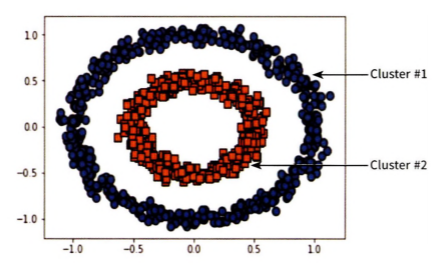
DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 
* 입실론(epsilon)으로 표기하는 주변 영역
> 입실론 주변 영역(epsilon)： 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points
> 최소 데이터 개수(min points)： 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
* 핵심 포인트(Core Point)： 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포
인트라고 합니다.
* 이웃 포인트(Neighbor Point)： 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 합니다.
* 경계 포인트(Border Point)： 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 합니다.
* 잡음 포인트(Noise Point)： 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 합니다.

1) 다음 그림과 같이 P1 에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명하겠습니다 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정하겠습니다.
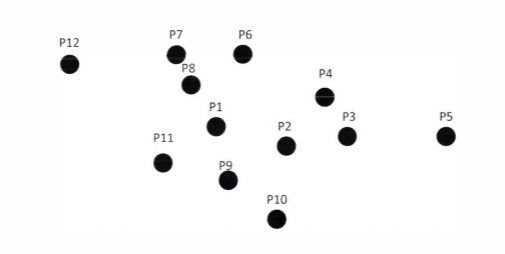
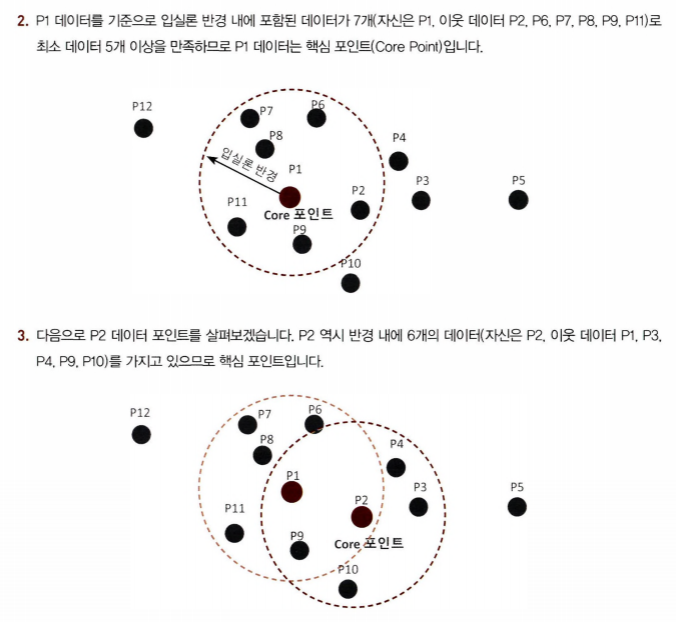
4) 핵심 포인트 P1 의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1 에서 P2로 연결해 직접 접근이 가능합니다.
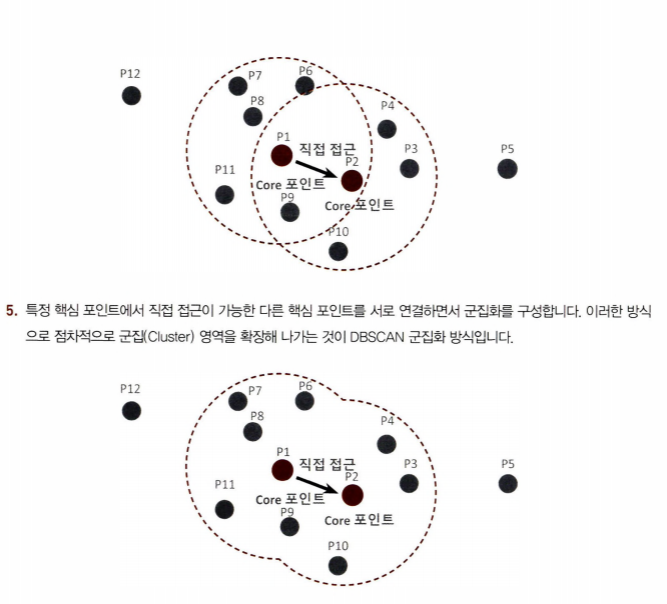
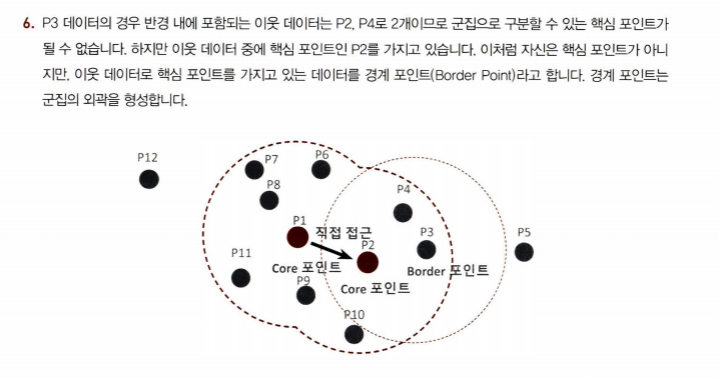
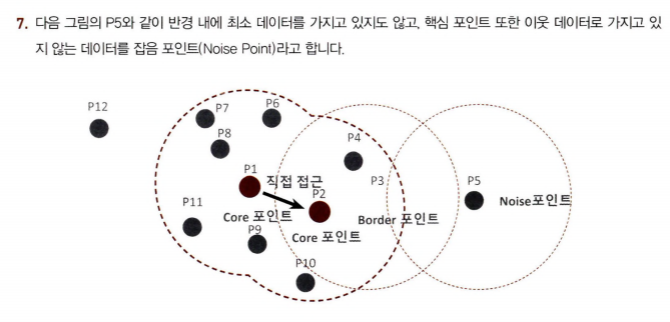

=> **DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식**

사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있다.
* eps： 입실론 주변 영역의 반경을 의미합니다.
* min_samples： 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미합니다（자신의 데이터를 포함합니다. 위에서 설명한 min points +1）.


In [33]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [35]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이
있습니다.
DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot( ) 함수를 이용해 시각화해 보겠습니다.
visualize_cluster_2c1() 함수 인자로 사용하기 위해 irisDF의 ‘ftrl’, ‘ftr2’ 칼럼에 PCA로 변환된 피처
데이터 세트를 입력하겠습니다.


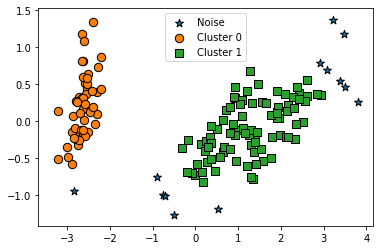

In [36]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

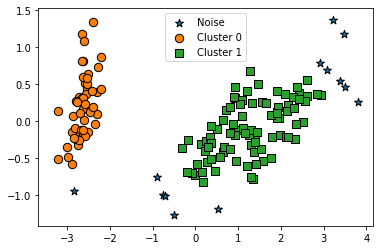

In [37]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


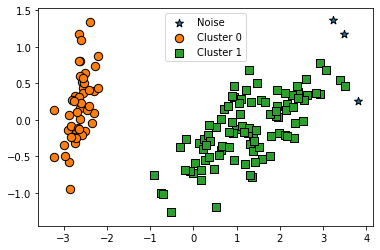

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


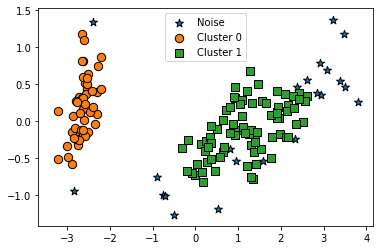

In [39]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### DBSCAN 적용하기 - make_circles() 데이터 세트
복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교

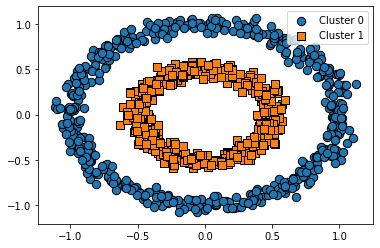

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
#noise는 노이즈 데이터 세트의 비율
#factor는 외부 원과 내부 원의 scale 비율
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


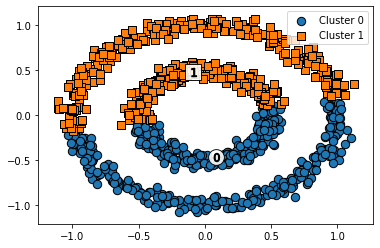

In [41]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


=> 위. 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됐습니다. 거리 기반 군집화로는 위와 같이
데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.


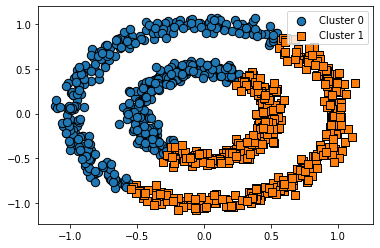

In [42]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

=>GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다

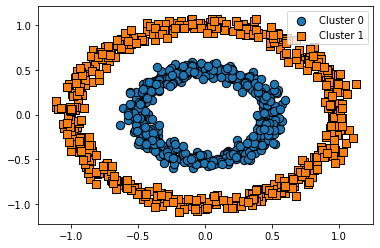

In [43]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

=> DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음을 알 수 있다.

### 06. 군집화 실습 - 고객 세그먼테이션

고객 세그먼테이션(Customer Segmentation)은 다양한 기준으로 고객을 분류하는 기법을 지칭한다. 고객 세그먼테이션은 CRM이나 마케팅의 중요 기반 요소.

고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기서는 기본적인 고객 분석 요소인 RFM 기법을 이용.

####  데이터 셋 로딩과 데이터 클린징

In [44]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='C:\\Users\\Administrator\\Downloads\\Online Retail.xlsx')
retail_df.head(3)   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [45]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [46]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [47]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [48]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


#### RFM 기반 데이터 가공

In [49]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [50]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [51]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [52]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [53]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


#### RFM 기반 고객 세그먼테이션

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

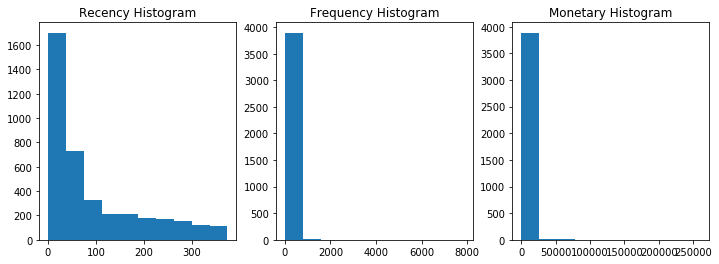

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [55]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [57]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [58]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

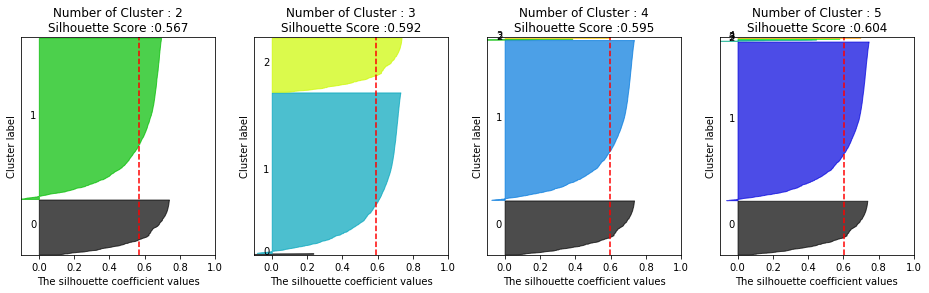

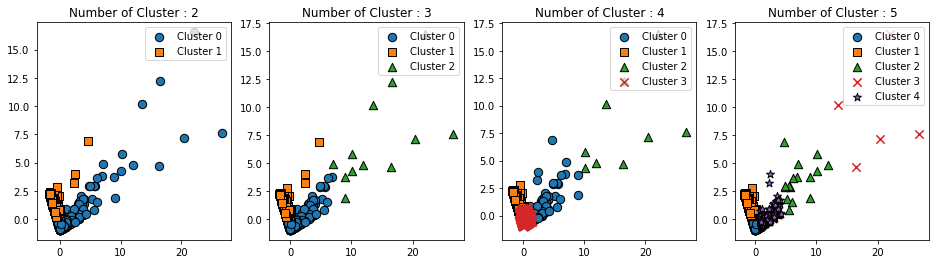

In [59]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [60]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.305


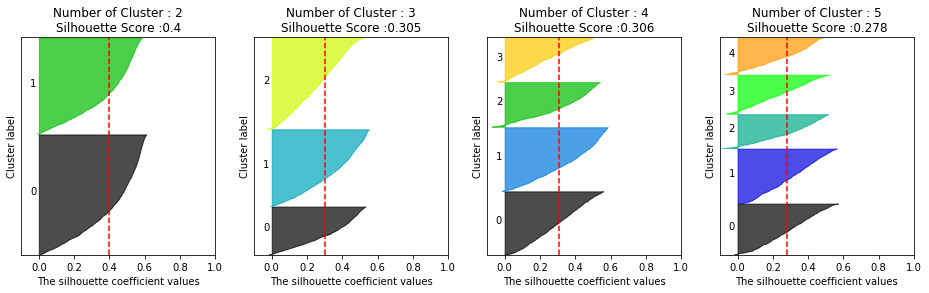

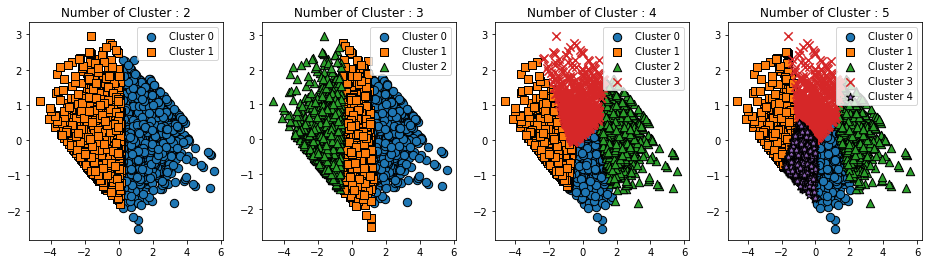

In [61]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)


=> 실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을
위 그림을 통해 알 수 있습니다. 이처럼 왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차
변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있습니다.
